## Sales Performance Analysis for a Retail Chain

### Objective: 

 Analyze sales performance across multiple stores of a retail chain to identify `top-performing products and stores`.

Dataset: Superstore Sales Dataset
https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales

### Import Tools 

In [1]:
import pandas as pd,\
seaborn as sns,\
matplotlib.pyplot as plt

#### Load dataset


> # Perform Exploratory Data Analysis

In [2]:
sales_store = pd.read_csv('datasets/salesStore.csv', encoding='latin-1')
sales_store_copy = sales_store[:]
sales_store

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
sales_store.isna().values.any()

False

# Anomalies Detected:
1. Order Date and Ship Date not a datetime

In [5]:
sales_store.duplicated().sum()

0

In [6]:
sales_store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
# Convert Ship Date and Order Date to datetime
sales_store['Ship Date'] = pd.to_datetime(sales_store['Ship Date'])
sales_store['Order Date'] = pd.to_datetime(sales_store['Order Date'])

In [8]:
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
sales_store.sort_values(by='Order Date', ascending=False)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
906,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176
907,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
1296,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
1297,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
645,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
741,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748


In [10]:
type(sales_store['Order Date'])

pandas.core.series.Series

In [11]:
sales_store['Order Date'].value_counts()

Order Date
2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-01    34
2017-12-02    34
              ..
2016-02-25     1
2016-10-25     1
2014-02-21     1
2016-10-18     1
2014-01-21     1
Name: count, Length: 1237, dtype: int64

In [12]:
sales_store['Order Date'].nunique()

1237

In [13]:
grp = sales_store.groupby('Order Date')
grp

In [14]:
grp[['Sales']].mean()

,Sales
Order Date,
2014-01-03,16.448000
2014-01-04,96.020000
2014-01-05,19.536000
2014-01-06,489.677778
2014-01-07,43.579000
...,...
2017-12-26,203.648500
2017-12-27,88.818000
2017-12-28,87.228989


In [15]:
b = sales_store['Order Date']
b

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [16]:
datt = b.dt.month
datt

0       11
1       11
2        6
3       10
4       10
        ..
9989     1
9990     2
9991     2
9992     2
9993     5
Name: Order Date, Length: 9994, dtype: int32

In [17]:
g = sales_store.groupby('Order Date')
gg = g[['Sales']].sum()
gg

,Sales
Order Date,
2014-01-03,16.4480
2014-01-04,288.0600
2014-01-05,19.5360
2014-01-06,4407.1000
2014-01-07,87.1580
...,...
2017-12-26,814.5940
2017-12-27,177.6360
2017-12-28,1657.3508


In [18]:
h = []
s = []
for a in datt:
    if a not in h:
        h.append(a)
    else:
        continue
        
    # print(a)

In [19]:
h

[11, 6, 10, 4, 12, 5, 8, 7, 9, 1, 3, 2]

In [20]:
gh = sales_store['Order Date'].dt.month.unique()

In [21]:
st = sales_store.groupby('Order Date')[['Sales']].sum()

In [22]:
sales_store[["Order Date", "Sales"]]

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680
...,...,...
9989,2014-01-21,25.2480
9990,2017-02-26,91.9600
9991,2017-02-26,258.5760
9992,2017-02-26,29.6000


In [23]:
sales_store['Order Date'].duplicated()

0       False
1        True
2       False
3       False
4        True
        ...  
9989    False
9990     True
9991     True
9992     True
9993     True
Name: Order Date, Length: 9994, dtype: bool

In [24]:
dup = sales_store[['Order Date', 'Sales']]
dup

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680
...,...,...
9989,2014-01-21,25.2480
9990,2017-02-26,91.9600
9991,2017-02-26,258.5760
9992,2017-02-26,29.6000


In [25]:
dup.shape

(9994, 2)

In [26]:
dup_dropped = dup.drop_duplicates()
dup_dropped.shape

(9981, 2)

In [27]:
dup_dropped

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680
...,...,...
9989,2014-01-21,25.2480
9990,2017-02-26,91.9600
9991,2017-02-26,258.5760
9992,2017-02-26,29.6000


In [28]:
sales_store.shape

(9994, 21)

In [29]:
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [30]:
a_month = sales_store['Order Date'].dt.month
a_month

0       11
1       11
2        6
3       10
4       10
        ..
9989     1
9990     2
9991     2
9992     2
9993     5
Name: Order Date, Length: 9994, dtype: int32

In [31]:
a_year = sales_store['Order Date'].dt.year
a_year

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Order Date, Length: 9994, dtype: int32

In [32]:
sales_store['a_month'] = a_month
sales_store['a_year'] = a_year

a_com = sales_store.groupby(['a_month', 'a_year'])['Sales']
a_com

In [33]:
a_com.sum().reset_index()

,a_month,a_year,Sales
0,1,2014,14236.8950
1,1,2015,18174.0756
2,1,2016,18542.4910
3,1,2017,43971.3740
4,2,2014,4519.8920
5,2,2015,11951.4110
6,2,2016,22978.8150
7,2,2017,20301.1334
8,3,2014,55691.0090
9,3,2015,38726.2520


<Axes: xlabel='a_month', ylabel='Sales'>

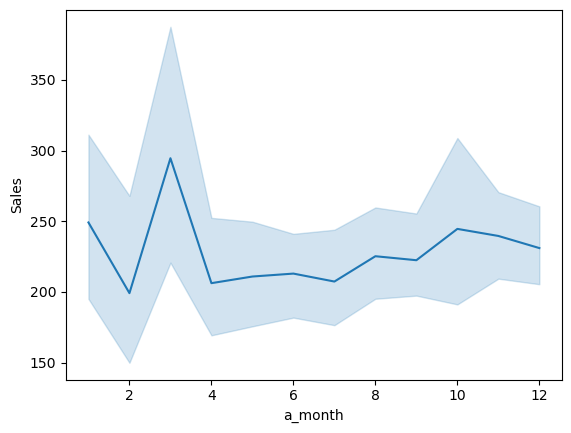

In [34]:
sns.lineplot(x=sales_store.a_month, y=sales_store.Sales)

In [35]:
sub_cat = sales_store.groupby('Sub-Category')[['Sales']].sum()

<Axes: xlabel='Sales', ylabel='Sub-Category'>

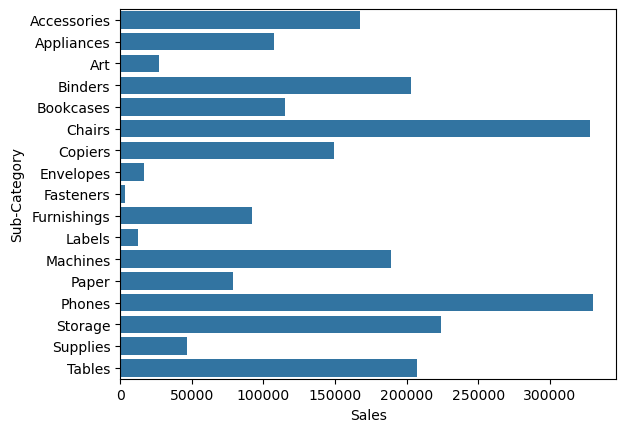

In [36]:
sns.barplot(y='Sub-Category', x='Sales', data=sub_cat)

In [37]:
category = sales_store.groupby('Category')[['Sales']].sum()
category

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


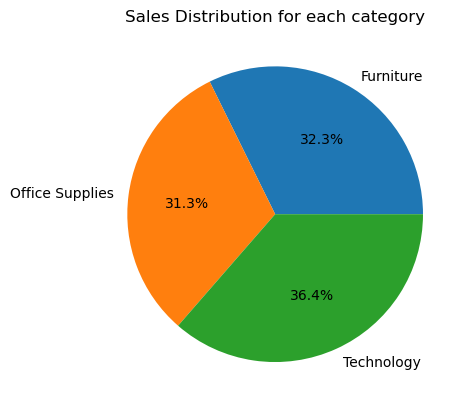

In [38]:
plt.pie(category.Sales, labels=category.index, autopct='%1.1f%%')
plt.title('Sales Distribution for each category')
plt.show()

In [39]:
sales_store['Sub-Category']

0         Bookcases
1            Chairs
2            Labels
3            Tables
4           Storage
           ...     
9989    Furnishings
9990    Furnishings
9991         Phones
9992          Paper
9993     Appliances
Name: Sub-Category, Length: 9994, dtype: object

In [40]:
sub_cat

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27118.7920
Binders,203412.7330
Bookcases,114879.9963
Chairs,328449.1030
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


Profit Analysis

In [41]:
sales_store

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,a_month,a_year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2,2017


In [42]:
sales_store['Profit']

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64

In [43]:
m_profit_value = sales_store.groupby(['a_month', 'a_year'])[['Profit']].sum().reset_index()
m_profit_value.sort_values(by='Profit', ascending=False)

,a_month,a_year,Profit
46,12,2016,17885.3093
38,10,2016,16243.1425
11,3,2017,14751.8915
41,11,2015,12474.7884
35,9,2017,10991.5556
9,3,2015,9732.0978
43,11,2017,9690.1037
34,9,2016,9328.6576
40,11,2014,9292.1269
39,10,2017,9275.2755


<Axes: xlabel='a_month', ylabel='Profit'>

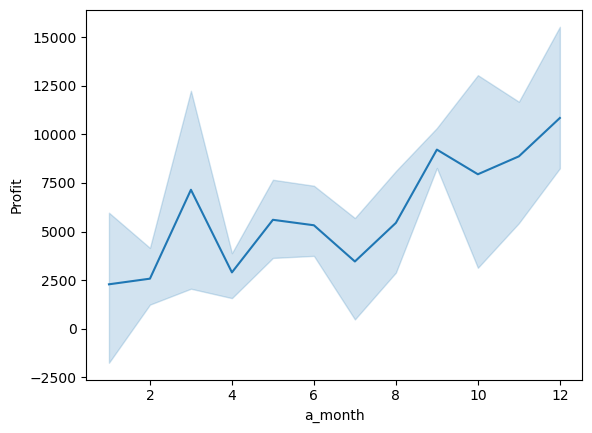

In [44]:
sns.lineplot(x=m_profit_value.a_month, y=m_profit_value.Profit, data=m_profit_value)

In [45]:
sub_profit = sales_store.groupby('Sub-Category')[['Profit']].sum()
sub_profit1 = sub_profit[sub_profit > 0]

In [46]:
sub_profit1 = sub_profit1.fillna(0.0)
sub_profit1

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Bookcases,0.0000
Chairs,26590.1663
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


<Axes: xlabel='Profit', ylabel='Sub-Category'>

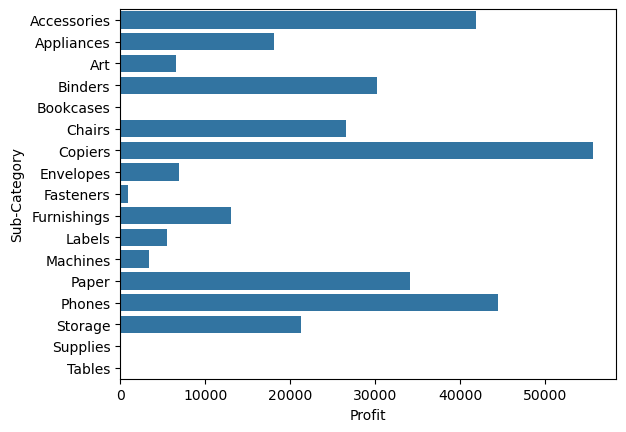

In [47]:
# Check bottom for this.
sns.barplot(x="Profit", y="Sub-Category", data=sub_profit1)

In [48]:
s = sub_profit[sub_profit > 0].dropna()

In [49]:
s

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Chairs,26590.1663
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182
Furnishings,13059.1436


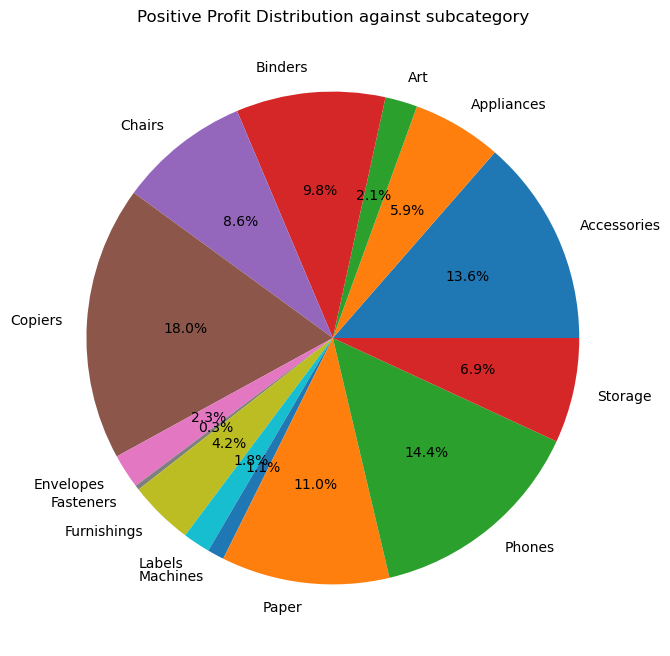

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(s.Profit, labels=s.index, autopct='%1.1f%%') 
plt.title('Positive Profit Distribution against subcategory')
plt.show()

In [51]:
cat_profit = sales_store.groupby('Category')[['Profit']].sum()
cat_profit

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


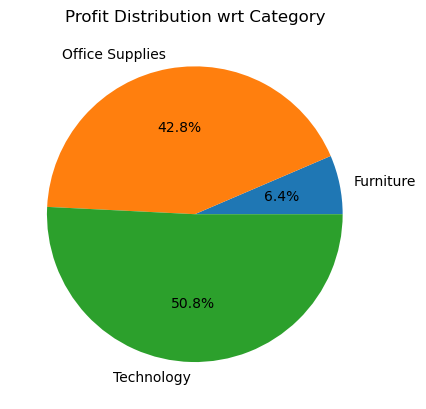

In [52]:
plt.pie(cat_profit.Profit, labels=cat_profit.index, autopct='%1.1f%%')
plt.title('Profit Distribution wrt Category')
plt.show()

In [53]:
# Loss for Sub-Category
sub_profit.sort_values(by='Profit', ascending=False)

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


In [54]:
sub_cat.sort_values(by='Sales', ascending=False)

,Sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


In [55]:
sub_profit.sum()

Profit    286397.0217
dtype: float64

In [56]:
sub_cat.sum()

Sales    2.297201e+06
dtype: float64

In [57]:
sales_store

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,a_month,a_year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2,2017


In [58]:
sales_store['Total Cost'] = sales_store['Sales'] * sales_store['Quantity']

In [59]:
# Check for date difference
date_diff = sales_store['Ship Date'] - sales_store['Order Date']

In [60]:
date_diff

0      3 days
1      3 days
2      4 days
3      7 days
4      7 days
        ...  
9989   2 days
9990   5 days
9991   5 days
9992   5 days
9993   5 days
Length: 9994, dtype: timedelta64[ns]

In [61]:
sales_store['Date Different'] = date_diff
sales_store

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,a_month,a_year,Total Cost,Date Different
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,523.9200,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,2195.8200,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,29.2400,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,4787.8875,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,44.7360,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,2014,75.7440,2 days
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2,2017,183.9200,5 days
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2,2017,517.1520,5 days
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2,2017,118.4000,5 days


In [62]:
dd = sales_store[['Ship Mode', 'Date Different']]
dd.sort_values(by='Date Different', ascending=False)

,Ship Mode,Date Different
3297,Standard Class,7 days
4130,Standard Class,7 days
4132,Standard Class,7 days
7742,Standard Class,7 days
7738,Standard Class,7 days
...,...,...
4303,Same Day,0 days
987,Same Day,0 days
9586,Same Day,0 days
5600,Same Day,0 days


In [63]:
cat_profit.sort_values(by='Profit', ascending=False)

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


In [64]:
category.sort_values(by='Sales', ascending=False)

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


In [65]:
sales_store[["Ship Mode", "Category", "Date Different"]].sort_values(by="Date Different", ascending=False)

,Ship Mode,Category,Date Different
3297,Standard Class,Office Supplies,7 days
4130,Standard Class,Office Supplies,7 days
4132,Standard Class,Office Supplies,7 days
7742,Standard Class,Office Supplies,7 days
7738,Standard Class,Technology,7 days
...,...,...,...
4303,Same Day,Office Supplies,0 days
987,Same Day,Office Supplies,0 days
9586,Same Day,Office Supplies,0 days
5600,Same Day,Office Supplies,0 days


In [66]:
sales_store[sales_store['Category'] == 'Office Supplies'].value_counts().sum()

6026

In [67]:
sales_store[sales_store['Category'] == 'Technology'].value_counts().sum()

1847

In [68]:
sales_store[sales_store['Category'] == 'Furniture'].value_counts().sum()

2121

Customer Segment Analysis

In [69]:
sales_store['Segment']

0        Consumer
1        Consumer
2       Corporate
3        Consumer
4        Consumer
          ...    
9989     Consumer
9990     Consumer
9991     Consumer
9992     Consumer
9993     Consumer
Name: Segment, Length: 9994, dtype: object

In [70]:
sales_store[sales_store['Segment'] == 'Consumer']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,a_month,a_year,Total Cost,Date Different
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,523.9200,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,2195.8200,3 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,4787.8875,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,44.7360,7 days
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,6,2014,342.0200,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,2014,75.7440,2 days
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2,2017,183.9200,5 days
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2,2017,517.1520,5 days
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2,2017,118.4000,5 days


## Performance By Segments
* 1. Consumer
  2. Corporate
  3. Head Office
 
With respect to **Sales** and **Profit**

In [71]:
sales_store['Segment'].value_counts().reset_index()

,Segment,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


In [72]:
# Sales by Segment
# Consumer
sales_segment = sales_store.groupby('Segment')[['Sales']].sum().sort_values(by='Sales', ascending=False)
sales_segment

,Sales
Segment,
Consumer,1.161401e+06
Corporate,7.061464e+05
Home Office,4.296531e+05


Text(0.5, 1.0, 'Sales Performance By Segment')

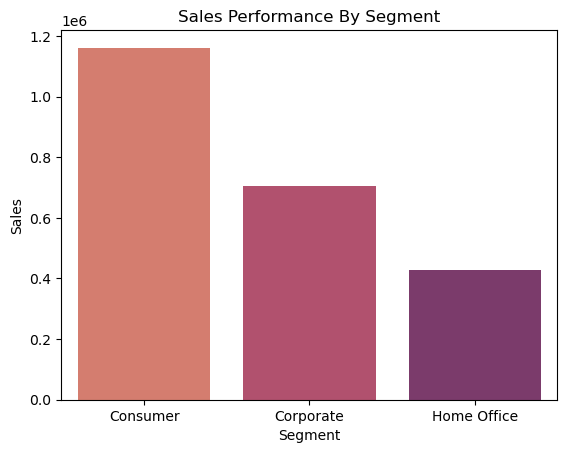

In [73]:
sns.barplot(data=sales_segment, x=sales_segment.index, y='Sales', legend=False, hue=sales_segment.index, palette='flare')
plt.title('Sales Performance By Segment')

In [74]:
# Profit by Segment
profit_segment = sales_store.groupby('Segment')[['Profit']].sum().sort_values(by='Profit', ascending=False)
profit_segment

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


Text(0.5, 1.0, 'Profit Performance By Segment')

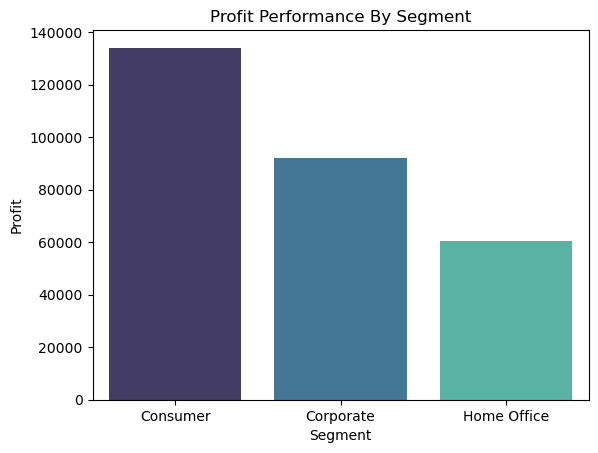

In [75]:
sns.barplot(data=profit_segment, x=profit_segment.index, y='Profit', hue=profit_segment.index, palette='mako', legend=False)
plt.title('Profit Performance By Segment') 

## Evaluation of Objectives:
* Top Performing Products:
  * > Sales
  * > Profit
* Top Performing Stores:
  * > Sales
  * > Profit 

In [76]:
sales_stores = sales_store.groupby('Category')[['Sales']].sum().sort_values(by='Sales', ascending=False)
sales_stores

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


Text(0.5, 1.0, 'Sales Performance By Stores')

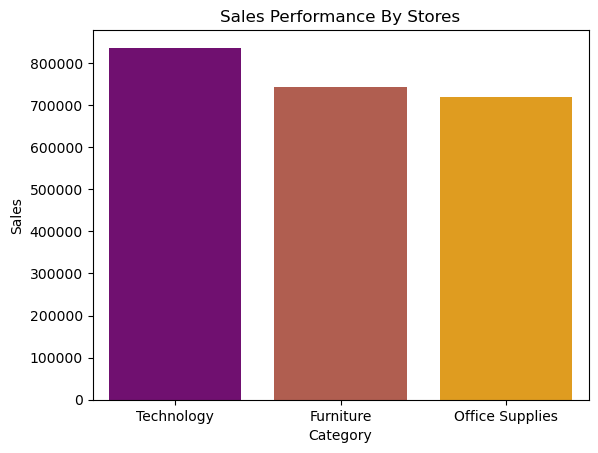

In [77]:
sns.barplot(data=sales_stores, x=sales_stores.index, y='Sales', hue=sales_stores.index, palette='blend:purple,orange', legend=False)
plt.title('Sales Performance By Stores')

In [78]:
profit_stores = sales_store.groupby('Category')[['Profit']].sum().sort_values(by="Profit", ascending=False)
profit_stores

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


Text(0.5, 1.0, 'Profit Perdormance By Stores')

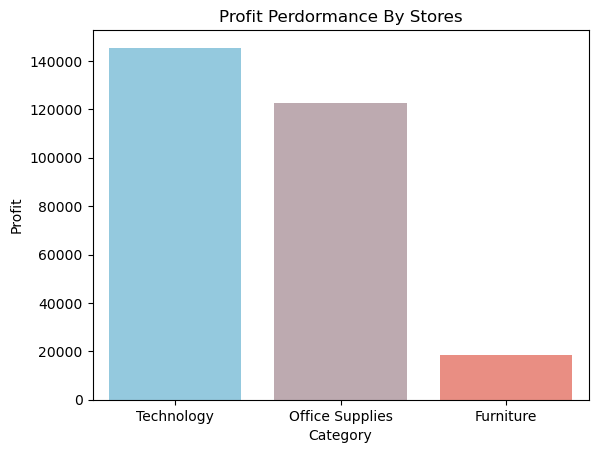

In [79]:
sns.barplot(data=profit_stores, x=profit_stores.index, y='Profit', hue=profit_stores.index, palette='blend:skyblue,salmon', legend=False)
plt.title('Profit Perdormance By Stores')

In [80]:
sales_per = sales_store.groupby('Sub-Category')[["Sales"]].sum().sort_values(by='Sales', ascending=False)
sales_per

,Sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


Text(0.5, 1.0, 'Top 10 sales Performing Products')

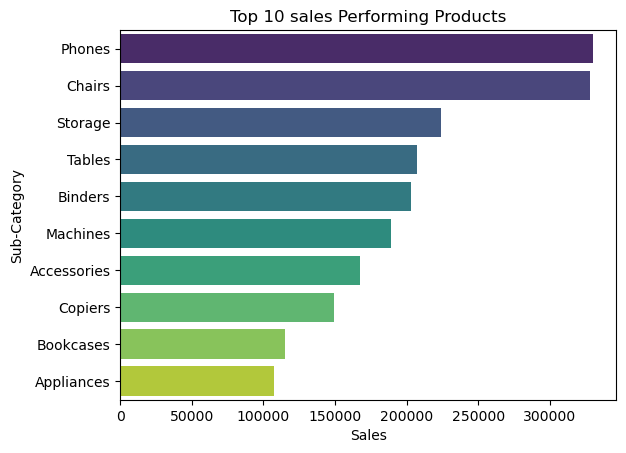

In [81]:
sns.barplot(data=sales_per[:10], x='Sales', y=sales_per.index[:10], orient='h', hue=sales_per.index[:10], palette='viridis', legend=False)
plt.title('Top 10 sales Performing Products')

In [82]:
profit_per = sales_store.groupby('Sub-Category')[['Profit']].sum().sort_values(by='Profit', ascending=False)
profit_per

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


Text(0.5, 1.0, 'TOP 10 Profit Performing Products')

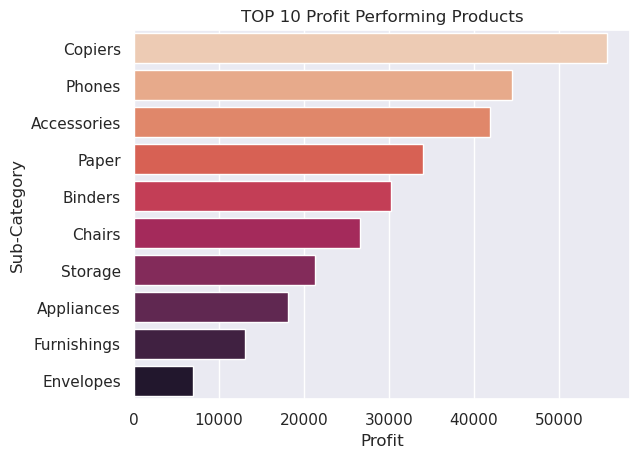

In [83]:
sns.set_theme(style='darkgrid')
sns.barplot(data=profit_per[:10], x='Profit', y=profit_per.index[:10], orient='h', hue=profit_per.index[:10], palette='rocket_r')
plt.title('TOP 10 Profit Performing Products')

In [84]:
# Top Profitable year
profit_years = sales_store[['Profit', 'a_year']]
profit_years

,Profit,a_year
0,41.9136,2016
1,219.5820,2016
2,6.8714,2016
3,-383.0310,2015
4,2.5164,2015
...,...,...
9989,4.1028,2014
9990,15.6332,2017
9991,19.3932,2017
9992,13.3200,2017


In [85]:
profit_year_perf = profit_years.pivot_table('Profit', index='a_year', aggfunc='sum').sort_values(by='Profit', ascending=False)
profit_year_perf

,Profit
a_year,
2017,93439.2696
2016,81795.1743
2015,61618.6037
2014,49543.9741


Text(0.5, 1.0, 'Profit Performance By Year')

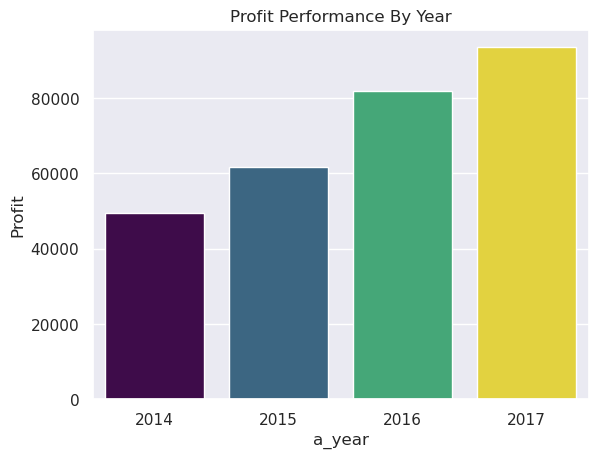

In [86]:
sns.barplot(data=profit_year_perf, x=profit_year_perf.index, y='Profit', hue=profit_year_perf.index, palette='viridis', legend=False)
plt.title('Profit Performance By Year')

In [87]:
# Top high performing year
sales_years = sales_store[['Sales', 'a_year']]
sales_years

,Sales,a_year
0,261.9600,2016
1,731.9400,2016
2,14.6200,2016
3,957.5775,2015
4,22.3680,2015
...,...,...
9989,25.2480,2014
9990,91.9600,2017
9991,258.5760,2017
9992,29.6000,2017


In [88]:
sales_year_perf = sales_years.pivot_table('Sales', index='a_year', aggfunc='sum').sort_values(by='Sales', ascending=False)
sales_year_perf

,Sales
a_year,
2017,733215.2552
2016,609205.5980
2014,484247.4981
2015,470532.5090


Text(0.5, 1.0, 'Profit Performance By Year')

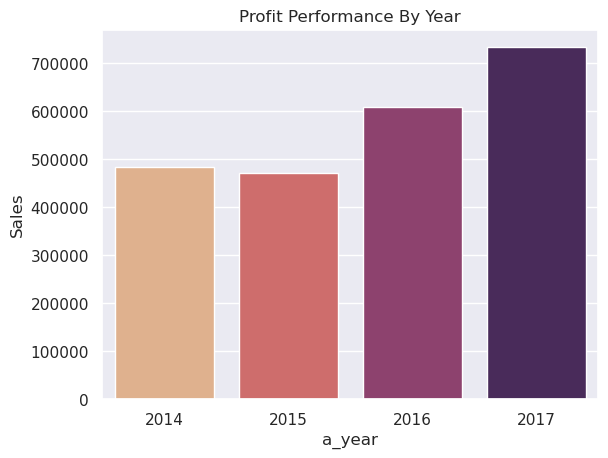

In [89]:
sns.barplot(data=sales_year_perf, x=sales_year_perf.index, y='Sales', hue=sales_year_perf.index, palette='flare', legend=False)
plt.title('Profit Performance By Year')

In [90]:
profit_months = sales_store.pivot_table('Profit', index='a_month', aggfunc='sum').sort_values(by='Profit', ascending=False)
profit_months

,Profit
a_month,
12,43369.1919
9,36857.4753
11,35468.4265
10,31784.0413
3,28594.6872
5,22411.3078
8,21776.9384
6,21285.7954
7,13832.6648


Text(0.5, 1.0, 'Monthly Profit Performance for the Whole Working Years')

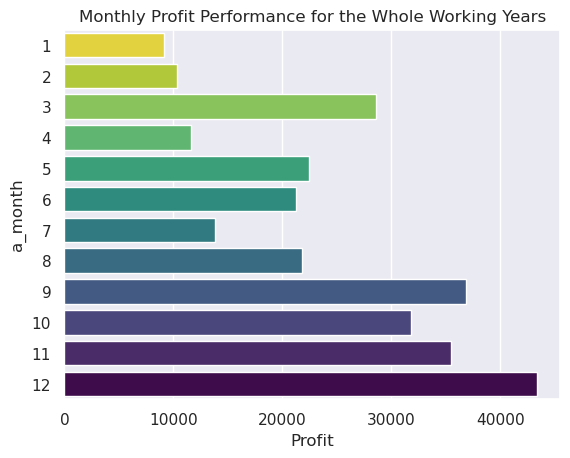

In [91]:
sns.barplot(data=profit_months, x='Profit', y=profit_months.index, hue=profit_months.index, palette='viridis_r', legend=False, orient='h')
plt.title('Monthly Profit Performance for the Whole Working Years')

In [92]:
sales_months = sales_store.pivot_table('Sales', index='a_month', aggfunc='sum').sort_values(by='Sales', ascending=False)
sales_months

,Sales
a_month,
11,352461.0710
12,325293.5035
9,307649.9457
3,205005.4888
10,200322.9847
8,159044.0630
5,155028.8117
6,152718.6793
7,147238.0970


Text(0.5, 1.0, 'Monthly Sales Performance for the Whole Working Years')

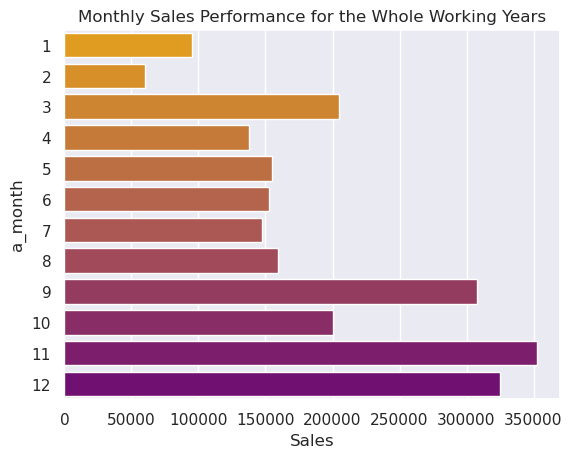

In [93]:
sns.barplot(data=sales_months, x='Sales', y=sales_months.index, hue=sales_months.index, palette='blend:orange,purple', legend=False, orient='h')
plt.title('Monthly Sales Performance for the Whole Working Years')

### Data Science And Machine Learning

### Evaluation:

To predict the sales of products based on given dataset

### Import Tools

This is a supervised learning dataset.

We will be using regression models algorithms.

It is a regression task because the label is continuous. 

#### Methods
* Split dataset into **Features Matrix** and  **Target Vector/Array**

 > Features Matrix are also know as `Independent Variable`.
 > Target Vector/Array is also known as `Dependent Variable`

* Split features matrix and target vector into Features Matrix training, testing sets and Target Vector training, testing sets

In [94]:
# Import tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDOneClassSVM
from sklearn.model_selection import train_test_split

In [95]:
# Check dataset for object
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Row ID          9994 non-null   int64          
 1   Order ID        9994 non-null   object         
 2   Order Date      9994 non-null   datetime64[ns] 
 3   Ship Date       9994 non-null   datetime64[ns] 
 4   Ship Mode       9994 non-null   object         
 5   Customer ID     9994 non-null   object         
 6   Customer Name   9994 non-null   object         
 7   Segment         9994 non-null   object         
 8   Country         9994 non-null   object         
 9   City            9994 non-null   object         
 10  State           9994 non-null   object         
 11  Postal Code     9994 non-null   int64          
 12  Region          9994 non-null   object         
 13  Product ID      9994 non-null   object         
 14  Category        9994 non-null   object  

In [96]:
# Convert object to category
for k, c in sales_store.items():
    if c.dtypes == 'object':
        sales_store[k] = sales_store[k].astype('category').cat.codes
    else:
        continue

In [97]:
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Row ID          9994 non-null   int64          
 1   Order ID        9994 non-null   int16          
 2   Order Date      9994 non-null   datetime64[ns] 
 3   Ship Date       9994 non-null   datetime64[ns] 
 4   Ship Mode       9994 non-null   int8           
 5   Customer ID     9994 non-null   int16          
 6   Customer Name   9994 non-null   int16          
 7   Segment         9994 non-null   int8           
 8   Country         9994 non-null   int8           
 9   City            9994 non-null   int16          
 10  State           9994 non-null   int8           
 11  Postal Code     9994 non-null   int64          
 12  Region          9994 non-null   int8           
 13  Product ID      9994 non-null   int16          
 14  Category        9994 non-null   int8    

In [98]:
sales_store

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,a_month,a_year,Total Cost,Date Different
0,1,2500,2016-11-08,2016-11-11,2,143,166,0,0,194,...,4,386,261.9600,2,0.00,41.9136,11,2016,523.9200,3 days
1,2,2500,2016-11-08,2016-11-11,2,143,166,0,0,194,...,5,839,731.9400,3,0.00,219.5820,11,2016,2195.8200,3 days
2,3,2296,2016-06-12,2016-06-16,2,237,201,1,0,266,...,10,1433,14.6200,2,0.00,6.8714,6,2016,29.2400,4 days
3,4,4372,2015-10-11,2015-10-18,3,705,687,0,0,153,...,16,366,957.5775,5,0.45,-383.0310,10,2015,4787.8875,7 days
4,5,4372,2015-10-11,2015-10-18,3,705,687,0,0,153,...,14,573,22.3680,2,0.20,2.5164,10,2015,44.7360,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,138,2014-01-21,2014-01-23,2,737,758,0,0,295,...,9,1586,25.2480,3,0.20,4.1028,1,2014,75.7440,2 days
9990,9991,3216,2017-02-26,2017-03-03,3,190,202,0,0,104,...,9,1535,91.9600,2,0.00,15.6332,2,2017,183.9200,5 days
9991,9992,3216,2017-02-26,2017-03-03,3,190,202,0,0,104,...,13,47,258.5760,2,0.20,19.3932,2,2017,517.1520,5 days
9992,9993,3216,2017-02-26,2017-03-03,3,190,202,0,0,104,...,12,929,29.6000,4,0.00,13.3200,2,2017,118.4000,5 days


In [99]:
# Convert categories to numbers
for label, content in sales_store.items():
    if content.dtypes == 'category':
        sales_store[label] = pd.Categorical(content).codes
    else:
        continue

In [100]:
df = sales_store.drop(['Total Cost', 'Date Different', 'Order Date', 'Ship Date'], axis=1)
df

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,a_month,a_year
0,1,2500,2,143,166,0,0,194,15,42420,...,12,0,4,386,261.9600,2,0.00,41.9136,11,2016
1,2,2500,2,143,166,0,0,194,15,42420,...,55,0,5,839,731.9400,3,0.00,219.5820,11,2016
2,3,2296,2,237,201,1,0,266,3,90036,...,946,1,10,1433,14.6200,2,0.00,6.8714,6,2016
3,4,4372,3,705,687,0,0,153,8,33311,...,319,0,16,366,957.5775,5,0.45,-383.0310,10,2015
4,5,4372,3,705,687,0,0,153,8,33311,...,1316,1,14,573,22.3680,2,0.20,2.5164,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,138,2,737,758,0,0,295,8,33180,...,200,0,9,1586,25.2480,3,0.20,4.1028,1,2014
9990,9991,3216,3,190,202,0,0,104,3,92627,...,164,0,9,1535,91.9600,2,0.00,15.6332,2,2017
9991,9992,3216,3,190,202,0,0,104,3,92627,...,1816,2,13,47,258.5760,2,0.20,19.3932,2,2017
9992,9993,3216,3,190,202,0,0,104,3,92627,...,1247,1,12,929,29.6000,4,0.00,13.3200,2,2017


In [101]:
# Extract Features matrix and target vector
X = df.drop('Sales', axis=1)

y = df['Sales']

In [102]:
X

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,a_month,a_year
0,1,2500,2,143,166,0,0,194,15,42420,2,12,0,4,386,2,0.00,41.9136,11,2016
1,2,2500,2,143,166,0,0,194,15,42420,2,55,0,5,839,3,0.00,219.5820,11,2016
2,3,2296,2,237,201,1,0,266,3,90036,3,946,1,10,1433,2,0.00,6.8714,6,2016
3,4,4372,3,705,687,0,0,153,8,33311,2,319,0,16,366,5,0.45,-383.0310,10,2015
4,5,4372,3,705,687,0,0,153,8,33311,2,1316,1,14,573,2,0.20,2.5164,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,138,2,737,758,0,0,295,8,33180,2,200,0,9,1586,3,0.20,4.1028,1,2014
9990,9991,3216,3,190,202,0,0,104,3,92627,3,164,0,9,1535,2,0.00,15.6332,2,2017
9991,9992,3216,3,190,202,0,0,104,3,92627,3,1816,2,13,47,2,0.20,19.3932,2,2017
9992,9993,3216,3,190,202,0,0,104,3,92627,3,1247,1,12,929,4,0.00,13.3200,2,2017


In [103]:
y

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64

In [104]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [105]:
X_train

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,a_month,a_year
9531,9532,2861,3,83,80,2,0,109,41,75217,0,1302,1,14,1103,2,0.20,5.5616,10,2017
7639,7640,2908,3,196,235,1,0,330,6,19711,1,34,0,4,381,2,0.00,101.6508,3,2017
2724,2725,627,3,203,207,0,0,497,3,94591,3,754,1,3,706,2,0.20,31.0856,10,2014
9570,9571,982,1,484,485,0,0,94,33,43229,1,1330,1,14,1554,2,0.20,1.6784,9,2015
118,119,4426,3,297,308,1,0,51,40,37620,2,779,1,3,681,1,0.70,-115.7156,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,3671,0,233,190,1,0,298,5,6460,1,281,0,9,486,2,0.00,8.5544,6,2017
5191,5192,4907,3,212,197,0,0,438,3,94122,3,885,1,7,1249,2,0.00,11.5800,5,2017
5390,5391,4081,2,556,567,1,0,452,45,98105,3,640,1,3,689,3,0.20,9.5526,11,2017
860,861,424,3,161,161,0,0,438,3,94122,3,1431,1,15,1496,2,0.00,0.1472,6,2014


In [106]:
y_train

9531     55.616
7639    441.960
2724     95.648
9570     33.568
118     157.794
         ...   
5734     25.160
5191     23.160
5390     26.352
860       7.360
7270    273.666
Name: Sales, Length: 7495, dtype: float64

In [107]:
# Initialize model algorithms
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
# Check slope
model.coef_

array([ 2.53604576e-05,  1.83184528e-03,  2.57122947e+00, -1.36414048e-02,
        3.25864798e-02, -4.64698886e+00, -4.10138590e-12,  6.90443121e-02,
        5.00400129e-01, -2.64181588e-04,  6.08492309e+00, -2.30770136e-01,
        1.73542331e+02,  2.08167925e+01, -3.16055928e-02,  4.24679765e+01,
        2.81755517e+02,  1.52237905e+00,  1.33315810e+00, -3.29819292e+00])

In [109]:
# Check intercept
model.intercept_

6481.021938572389

In [110]:
# Predict 
ypred = model.predict(X_test)
ypred

array([250.84416248, 109.43028649, 144.5751919 , ..., 214.37845922,
        67.23645047,  53.80616916])

In [111]:
# Score --- for accuracy
model.score(X_test, y_test)

0.00030733954852490974

In [112]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor()

In [113]:
model.predict(X_test)

array([263.40919,  34.88344,  53.489  , ...,  39.3093 , 174.80782,
         8.67538])

In [114]:
model.score(X_test, y_test)

0.6057696419926003

### Tuning RandomForestRegressor

In [131]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


In [132]:
ranFor = {
    'n_estimators': np.arange(10, 100, 10),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
}

In [135]:
%%time
model = RandomizedSearchCV(estimator=RandomForestRegressor(),
                          param_distributions=ranFor,
                          n_iter=2,
                          cv=5)
model.fit(X_train, y_train)

CPU times: user 2min 30s, sys: 1.29 s, total: 2min 31s
Wall time: 2min 33s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=2,
                   param_distributions={'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [136]:
model.best_params_

{'n_estimators': 60, 'min_samples_split': 14, 'min_samples_leaf': 3}

In [139]:
model = RandomForestRegressor(n_estimators=60,
                             min_samples_split=14,
                             min_samples_leaf=3, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=14, n_estimators=60,
                      random_state=42)

In [140]:
model.predict(X_test)

array([269.9176462 ,  34.482254  ,  54.4542033 , ...,  52.31860882,
       189.72846627,   8.73672471])

In [141]:
model.score(X_test, y_test)

0.579751893505345

In [138]:
model.score(X_test, y_test)

0.5921340292009085